# Running different algorithms

### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from os import listdir

### Defining path to data

In [2]:
path = 'C:/Users/izaou/Documents/ML_Project-master/clean_data/'

In [3]:
print(listdir(path))

['Parameters', 'targets.csv', 'targets_flat.csv', 'test.csv', 'train.csv']


### Loading train data

In [4]:
train = pd.read_csv(path + 'train.csv', index_col='user_id')
targets = pd.read_csv(path + 'targets_flat.csv', dtype={"user_id":object, "country_destination":object}, index_col=['user_id'])
targets_train = targets[targets.country_destination.notnull()].values.reshape(-1,)

In [5]:
targets_train

array(['NDF', 'NDF', 'US', ..., 'NDF', 'NDF', 'NDF'], dtype=object)

## Predicting classes by taking out age and gender

### Defining the train dataset

In [6]:
#df_train = train.drop(['age', 'gender__MALE', 'gender__FEMALE', 'gender__OTHER'], axis = 1)
df_train = train.drop([ 'gender__MALE', 'gender__FEMALE', 'gender__OTHER'], axis = 1)

### Importing libraries

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import timeit
from sklearn.cross_validation import train_test_split #for splitting data into train and test



C:\Users\izaou\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
X_train, X_test, y_train, y_test=train_test_split(df_train,targets_train,test_size=0.2,random_state=1)


### Defining classifiers

In [75]:
from sklearn.metrics import  accuracy_score

def test_classifier(X_train, y_train, X_test, y_test, classifier):
    print("")
    print("=====================")
    start = timeit.default_timer()
    classifier_name = str(type(classifier).__name__)
    print("Testing " + classifier_name)
    model = classifier.fit(X_train, y_train)
    predictions = model.predict(X_test)
    stop = timeit.default_timer()
    accuracy = accuracy_score(y_test, predictions)
    
    print("========== Results==========")
    print("Accuracy " + str(accuracy))
    print( 'running time:' ,stop - start, 's')
    print("============================")

    return predictions

### Fitting data

In [76]:
X_train, X_test, y_train, y_test=train_test_split(df_train,targets_train,test_size=0.2,random_state=1)

In [77]:
tree=DecisionTreeClassifier()
pred_tree=test_classifier(X_train, y_train, X_test, y_test, tree)


Testing DecisionTreeClassifier
=================================== Results ======================================
Accuracy 0.437633224801
('running time:', 5.535978259601815, 's')


In [78]:
rf=RandomForestClassifier()
pred_rf=test_classifier(X_train, y_train, X_test, y_test, rf)


Testing RandomForestClassifier
=================================== Results ======================================
Accuracy 0.509521913284
('running time:', 8.681015173958176, 's')


In [79]:
GB=GradientBoostingClassifier()
pred_gb=test_classifier(X_train, y_train, X_test, y_test, GB)


Testing GradientBoostingClassifier
=================================== Results ======================================
Accuracy 0.592115434166
('running time:', 924.6156591516112, 's')


In [80]:
XGB=xgb.XGBClassifier()
pred_xgb=test_classifier(X_train, y_train, X_test, y_test, XGB)


Testing XGBClassifier
=================================== Results ======================================
Accuracy 0.592630765267
('running time:', 732.5295261199688, 's')


In [81]:
#lr=LogisticRegression()
#pred_log=test_classifier(X_train, y_train, X_test, y_test, lr)

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[    0     1     0     0     1     0     1    78     0     0    20     1]
 [    0     1     0     2     2     4     4   188     0     0    77     4]
 [    0     1     1     1     3     1     1   146     0     0    56     3]
 [    0     0     2     3     4     3     4   311     0     1   123     8]
 [    3     6     5     3    12     7     6   629     2     1   271    18]
 [    0     3     3     6     7     9     5   307     1     1   136    10]
 [    1     3     4     5    13     6     3   385     1     0   150    15]
 [   26    92    48   102   294   122   149 18433    45    11  5209   467]
 [    1     0     0     2     3     1     1    89     0     0    41     2]
 [    0     0     0     0     2     0     0    26     0     0    15     0]
 [    8    43    36    66   169    62    87  8435    16     4  3226   275]
 [    2    10     6     6    39    14    11  1332     2     1   503    64]]


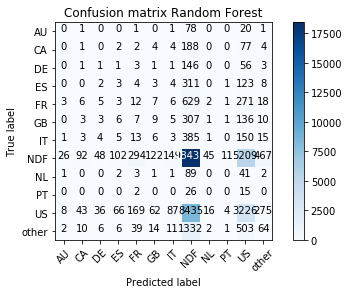

In [85]:
from sklearn.metrics import confusion_matrix
import itertools
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_rf)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Random Forest')

Confusion matrix, without normalization
[[    0     3     1     2     6     1     1    61     0     0    19     8]
 [    1     0     2     5     9     3     6   142     1     1    99    13]
 [    2     1     3     1     7     5     6   111     0     0    61    16]
 [    2     3     0     9    13     7     8   228     3     1   155    30]
 [    4     7     5    15    34    16    26   493     2     2   310    49]
 [    3     7     6    11    15     7     6   243     3     2   160    25]
 [    5     4     5    13    17     9    16   309     2     0   180    26]
 [   74   194   124   306   671   301   361 14571   100    28  6985  1283]
 [    0     0     0     3     4     0     2    79     1     0    45     6]
 [    0     0     0     1     0     0     2    19     0     0    17     4]
 [   38   105    77   175   360   159   205  6657    50    22  3907   672]
 [    5    15    16    20    52    31    36  1038    16     2   624   135]]


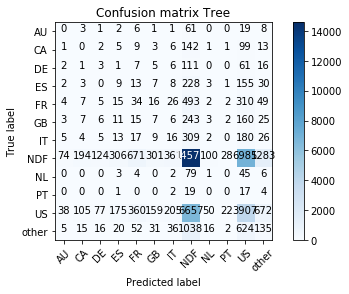

In [86]:
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_tree)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Tree')

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0    97     0     0     5     0]
 [    0     0     0     0     0     0     0   256     0     0    26     0]
 [    0     0     0     0     0     0     0   195     0     0    18     0]
 [    0     0     0     0     0     0     0   417     0     0    42     0]
 [    0     0     0     0     0     0     0   888     0     0    75     0]
 [    0     0     0     0     0     0     0   454     0     0    34     0]
 [    0     1     0     0     0     0     1   539     0     0    45     0]
 [    7     2     1     2     3     5     5 24456     2     4   511     0]
 [    0     0     0     1     0     0     0   130     0     0     9     0]
 [    0     0     0     0     0     0     0    40     0     0     3     0]
 [    1     0     1     3     1     0     1 11598     1     0   821     0]
 [    0     0     1     0     1     0     0  1876     0     0   112     0]]


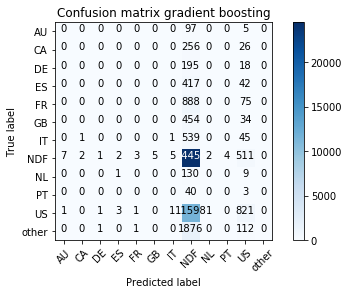

In [88]:
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_gb)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix gradient boosting')

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0    99     0     0     3     0]
 [    0     0     0     0     0     0     0   260     0     0    22     0]
 [    0     0     0     0     0     0     0   195     0     0    18     0]
 [    0     0     0     0     0     0     0   424     0     0    35     0]
 [    0     0     0     0     0     0     0   894     0     0    69     0]
 [    0     0     0     0     0     0     0   461     0     0    27     0]
 [    0     0     0     0     0     0     0   545     0     0    41     0]
 [    0     0     0     0     0     0     0 24529     0     0   469     0]
 [    0     0     0     0     0     0     0   131     0     0     9     0]
 [    0     0     0     0     0     0     0    40     0     0     3     0]
 [    0     0     0     0     0     0     0 11656     0     0   771     0]
 [    0     0     0     0     0     0     0  1890     0     0   100     0]]


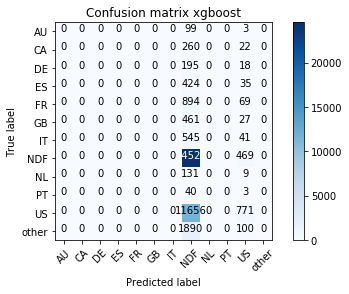

In [87]:
class_names=['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US','other']
cnf_matrix=confusion_matrix(y_test,pred_xgb)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix xgboost')